In [1]:
#***EDA***

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

medical_data = pd.read_csv(url, sep=',')
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Tenemos un conjuntos de datos con 1338 filas y 7 columnas en la que no tenemos ningún valor nulo. Pasamos a analizarlas*

*ANÁLISIS UNIVARIANTE*


#Categóricas

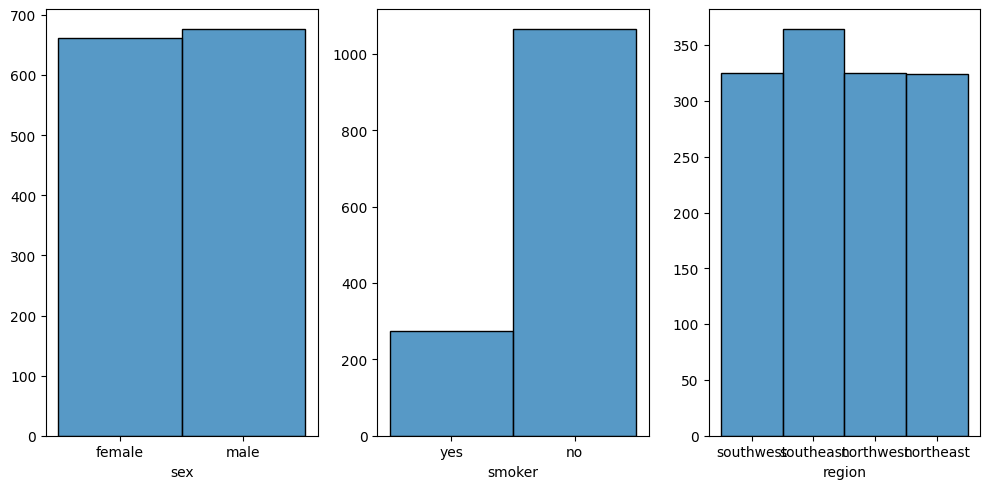

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.histplot(ax = axis[0], data = medical_data, x = "sex").set(ylabel = None)
sns.histplot(ax = axis[1], data = medical_data, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data = medical_data, x = "region").set(ylabel = None)


plt.tight_layout()
plt.show()

*Podemos ver como los datos de sexo y region están muy repartidos, mientras que los de fumador están completamente desbalanceados siendo los NO casi cuatros veces los datos del sí.*

#Numéricas

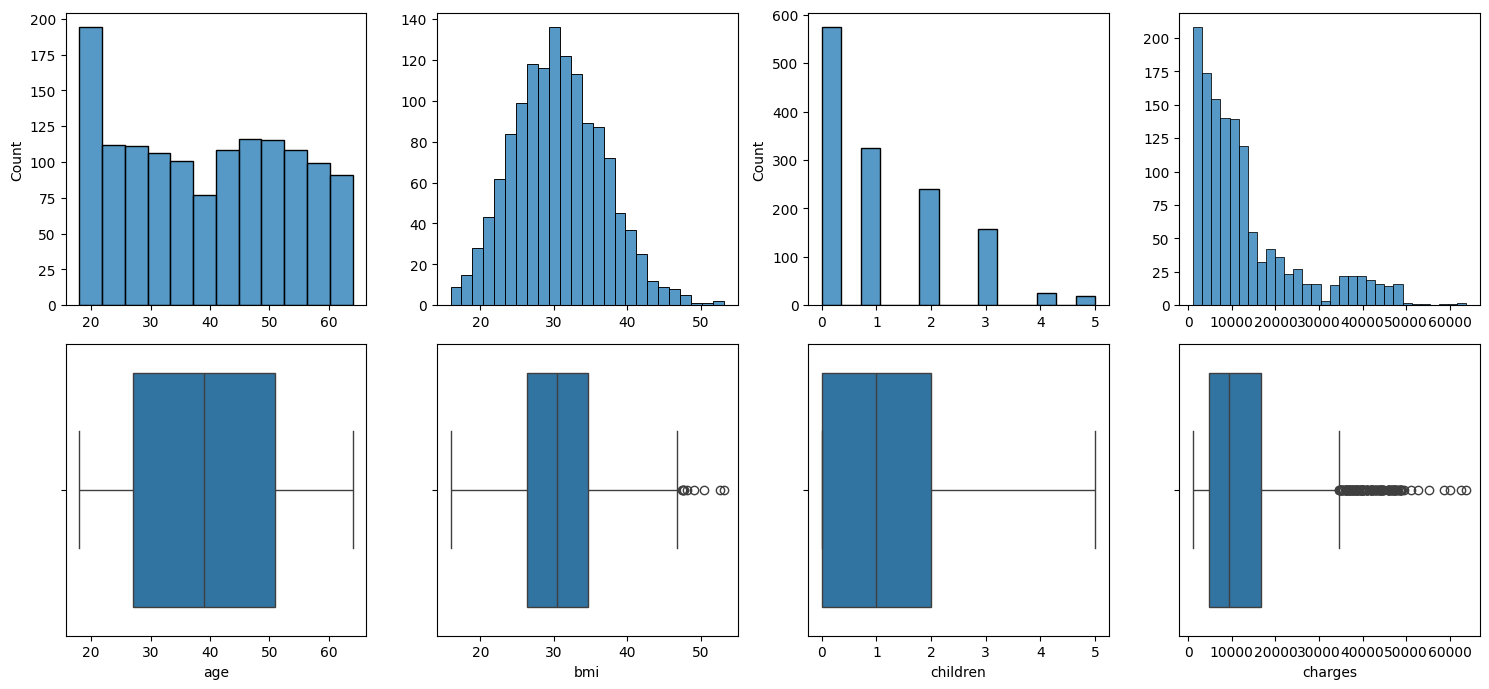

In [4]:
fig, axis = plt.subplots(2, 4, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = medical_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = medical_data, x = "age")
sns.histplot(ax = axis[0, 1], data = medical_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = medical_data, x = "bmi")
sns.histplot(ax = axis[0, 2], data = medical_data, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = medical_data, x = "children")
sns.histplot(ax = axis[0, 3], data = medical_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = medical_data, x = "charges")

plt.tight_layout()
plt.show()

*Podemos en la variable objetivo(charges), como los precios de las mutuas se concentran een torno a los 5-15k y hay varias tarifas al otro extremo que tendremos que analizar porque se tratan
#la variable de la masa corporal hace casi la forma de la normal y van los índices en torno al 30%. La variable edad nos da unos resultados muy heterogeneos teniendo cierta tendencia en las edades de los 17 a los 22 años.*

***Análisis Multivariante***

*Análisis numérico-numérico*

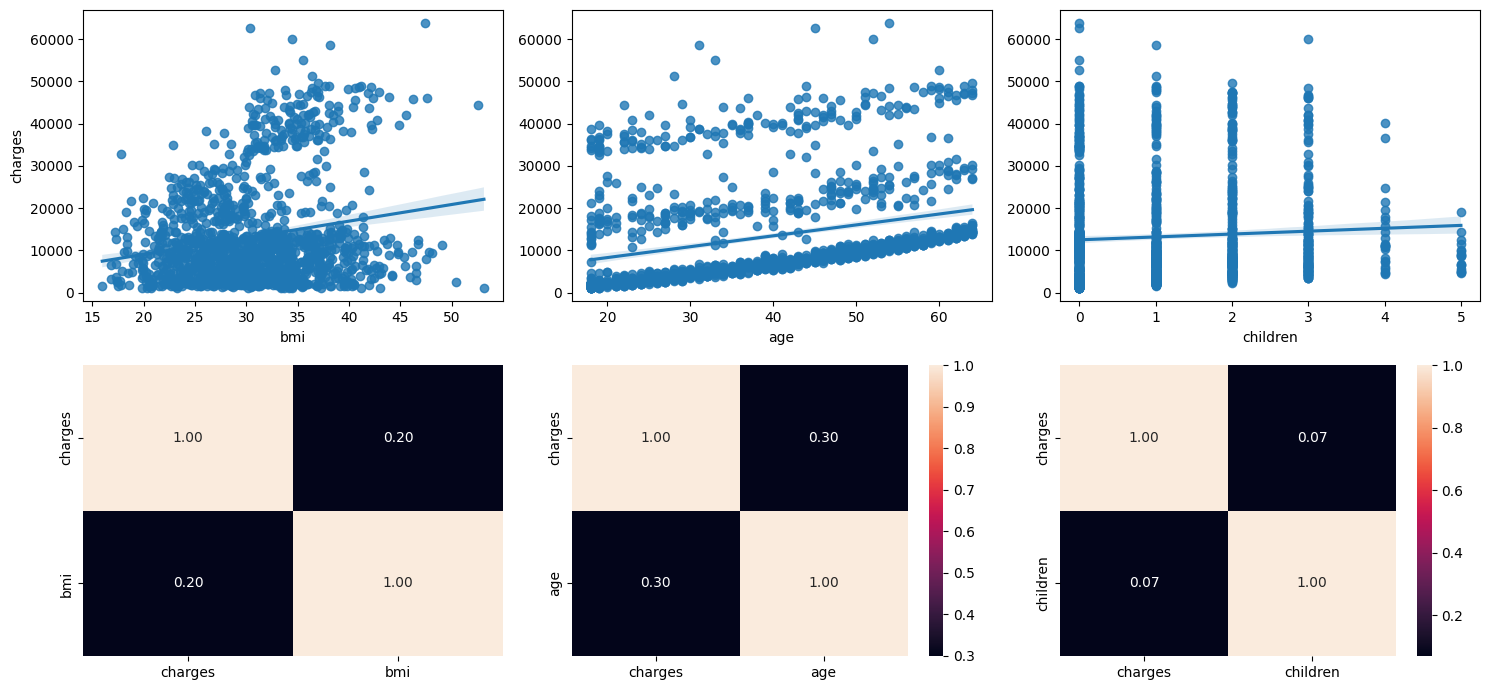

In [5]:
fig, axis = plt.subplots(2,3 , figsize = (15, 7))

sns.regplot(ax = axis[0, 0], data = medical_data, x = "bmi", y = "charges")
sns.heatmap(medical_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = medical_data, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(medical_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = medical_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(medical_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()
plt.show()

*Analizamos la relación de las variables con nuestro targey(charges), que es el precio de la mutua de seguros. Vemos que hay cierta tendencia y relación con las variables de edad e índice de masa corporal, pero no así con los hijos al cargo del cliente*

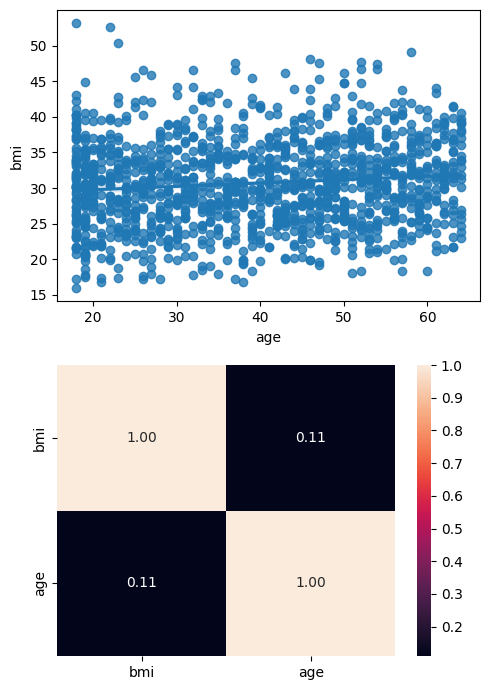

In [6]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = medical_data, x = "age", y = "bmi")
sns.heatmap(medical_data[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

plt.tight_layout()
plt.show()

*Analizamos también la relación entre edad e índice de masa corporal para ver las posibles sinergias pero no vemos una relación o sinergia que pueda crear una tendencia en el conjunto de datos*

*Análisis categórico-categórico*

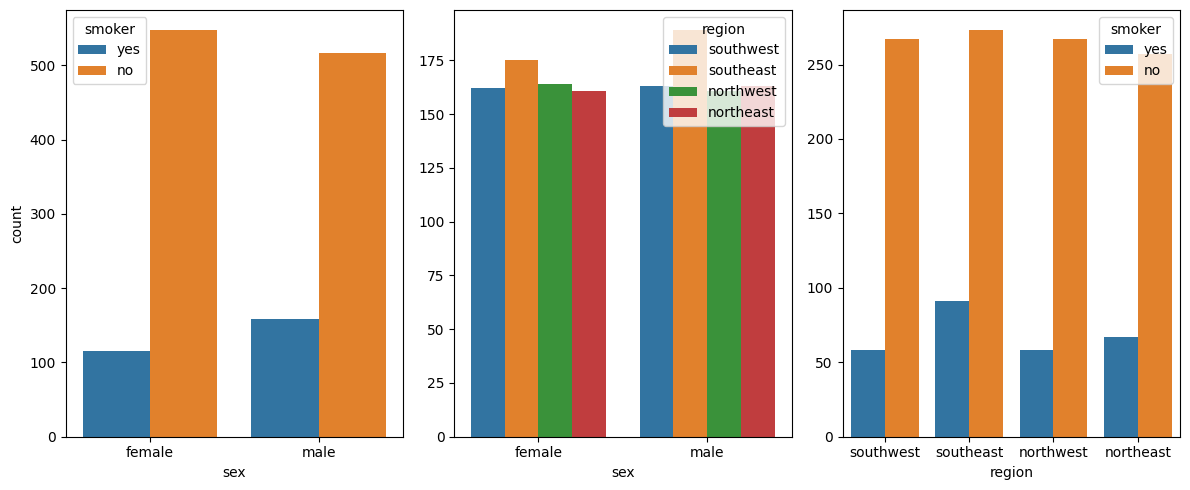

In [7]:
fig, axis = plt.subplots(1, 3, figsize = (12, 5))

sns.countplot(ax = axis[0], data = medical_data, x = "sex", hue = "smoker")
sns.countplot(ax = axis[1], data = medical_data, x = "sex", hue = "region").set(ylabel = None)
sns.countplot(ax = axis[2], data = medical_data, x = "region", hue = "smoker").set(ylabel = None)

plt.tight_layout()
plt.show()

*No obsevamos ningún tipo de relación ni tendencia*

*Análisis de correlaciones*

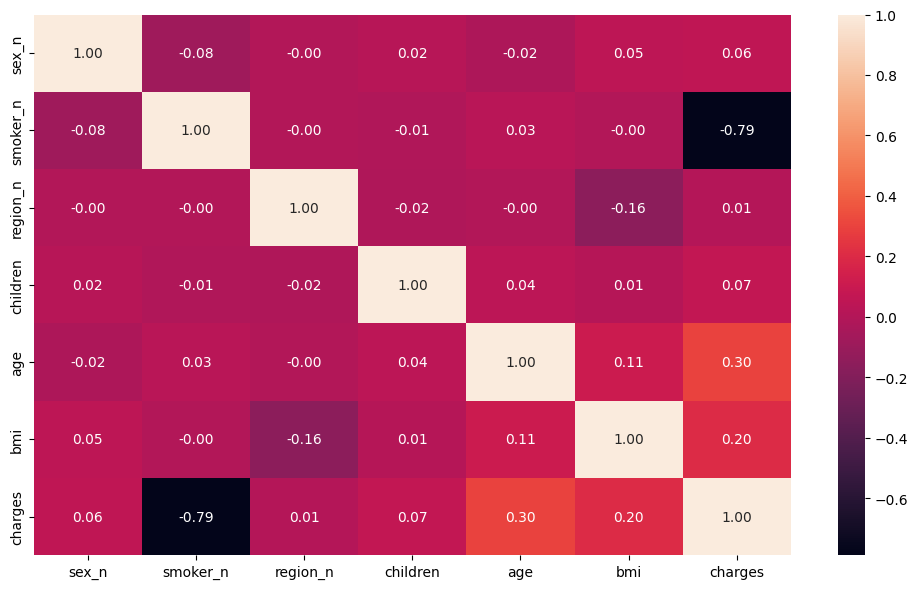

In [8]:
medical_data["sex_n"] = pd.factorize(medical_data["sex"])[0]
medical_data["smoker_n"] = pd.factorize(medical_data["smoker"])[0]
medical_data["region_n"] = pd.factorize(medical_data["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(medical_data[["sex_n", "smoker_n", "region_n", "children", "age", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

*Analizando las correlaciones, podemos observar claramente las variables clave de obtener un valor para "charges". Únicamente nos valdran: edad, si es fumador/a y el índice de masa corporal(bmi). Vemos como existen relaciones que nos hacen ver que ahí es donde podemos ver la dependencia. Pasamos a graficarlo.
Para el resto no encontramos relaciones interesantes, por lo que lo más lógico sería elimarlas de nuestri conjunto de datos. Pasamos a eliminarlas.

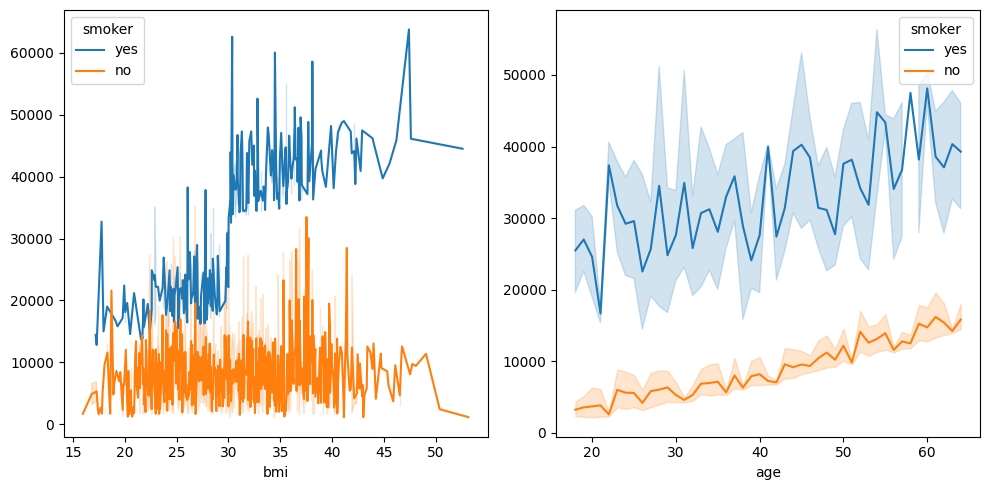

In [9]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.lineplot(ax = axis[0], data = medical_data, x = "bmi", y = "charges", hue = "smoker").set(ylabel = None)
sns.lineplot(ax = axis[1], data = medical_data, x = "age", y = "charges", hue = "smoker").set(ylabel = None)

plt.tight_layout()

plt.show()

*Analizamos la relación de las variables clave con la tarifa de la mutua, vemos como claramente si es fumador o no, se ve muy reflejado en el precio y el índice de masa corporal es muy destacable a partir de 30% que podemos estar hablando de obesidad y por tanto mayor riesgo de patologías* 

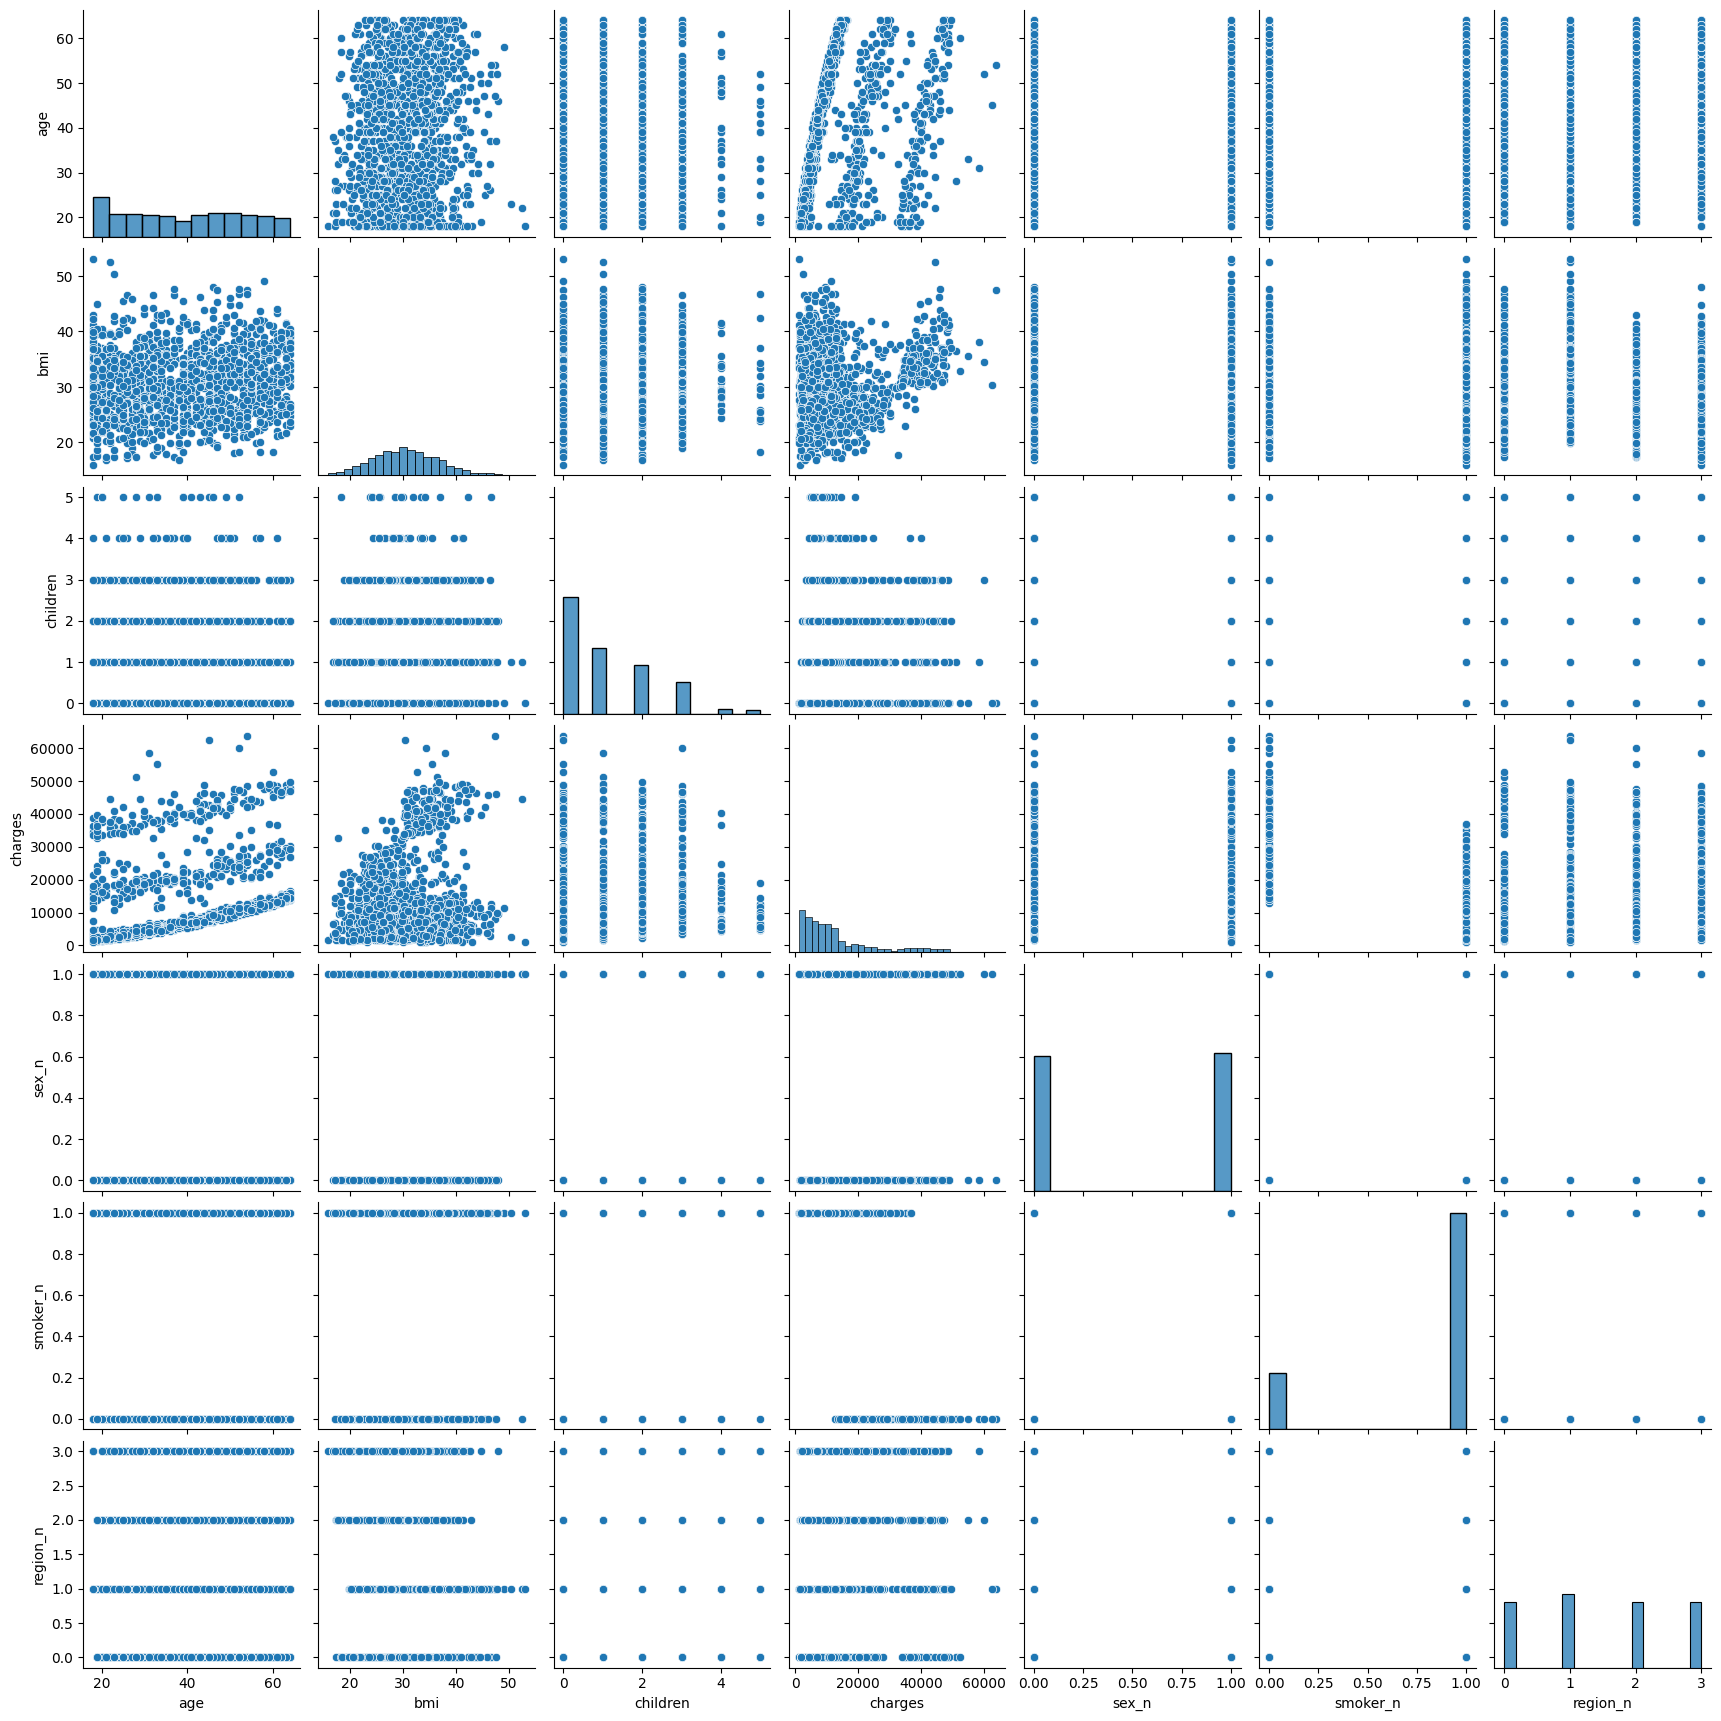

In [10]:
sns.pairplot(data=medical_data)

***Ingeniería de características***

In [11]:
medical_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


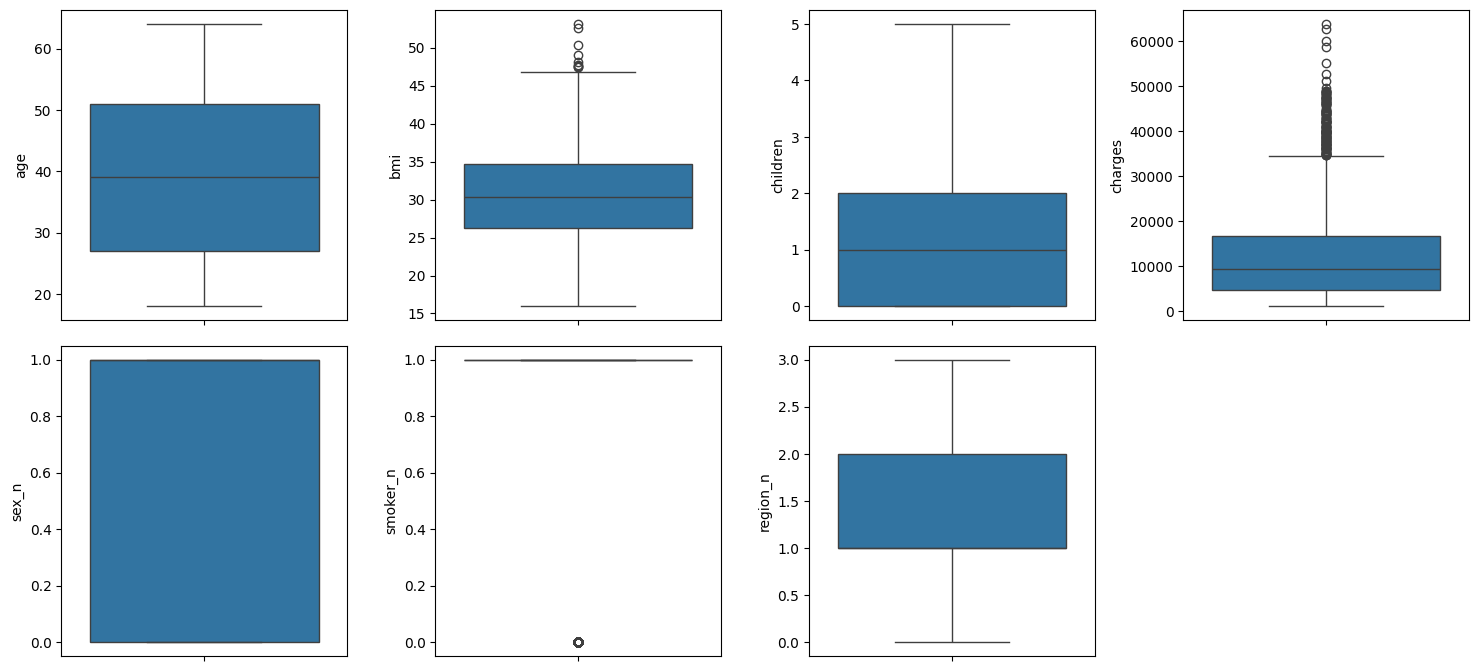

In [12]:
fig, axis = plt.subplots(2, 4, figsize = (15, 7))

sns.boxplot(ax = axis[0, 0], data = medical_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = medical_data, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = medical_data, y = "children")
sns.boxplot(ax = axis[0, 3], data = medical_data, y = "charges")
sns.boxplot(ax = axis[1, 0], data = medical_data, y = "sex_n")
sns.boxplot(ax = axis[1, 1], data = medical_data, y = "smoker_n")
sns.boxplot(ax = axis[1, 2], data = medical_data, y = "region_n")


plt.tight_layout()
fig.delaxes(axis[1, 3])
plt.show()

*Vemos que existen outliers significativos en nuestra varible target, no haremos nada. Y también en la varible del índice de masa coporal que entendemos que son datosn reales que nos valen para nuestro modelo. Por lo que no haremos nada con ellos.

*En cuanto al análisis de los valores faltantes, no tenemos ninguno en nuestro conjunto de datos. Por otro lado, no vemos posible realizar nuevas características con los datos de los que disponemos*

**Escalado de valores : Normalización**

In [13]:
from sklearn.preprocessing import StandardScaler

num_variables = ["age", "bmi", "smoker_n", "children"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(medical_data[num_variables])
medical_data_norm = pd.DataFrame(norm_features, index = medical_data.index, columns = num_variables)
medical_data_norm["charges"] = medical_data["charges"]
medical_data_norm.head()

,age,bmi,smoker_n,children,charges
0,-1.438764,-0.453320,-1.970587,-0.908614,16884.92400
1,-1.509965,0.509621,0.507463,-0.078767,1725.55230
2,-0.797954,0.383307,0.507463,1.580926,4449.46200
3,-0.441948,-1.305531,0.507463,-0.908614,21984.47061
4,-0.513149,-0.292556,0.507463,-0.908614,3866.85520


**División de datos en TRAIN y TEST**

In [14]:
from sklearn.model_selection import train_test_split

# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = medical_data_norm.drop("charges", axis = 1)
y = medical_data_norm["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [15]:
X_train.to_csv("/workspaces/JLL_Linear_Regresion_ML/data/processed/medical_data_train.csv", index=False)
X_test.to_csv("/workspaces/JLL_Linear_Regresion_ML/data/processed/medical_data_test.csv", index=False)

***Inicio y entrenamiento del modelo***

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 13316.407370620895
Coeficientes (b): [ 3610.48961575  1996.54770967 -9545.09158466   514.79398108]


**Predicción del modelo**

In [18]:
y_pred = model.predict(X_test)
y_pred

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.69484389,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 33981653.95019776
Coeficiente de determinación: 0.7811147722517886


*Si nos apoyamos en el valor del R2, observamos que es de un 77%, un valor alto, luego el 77% de los datos están explicados por el modelo, por lo que es satisfactorio aunque mejorable.